In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm.notebook import tqdm

sns.set(style='whitegrid', font_scale=1.3)

In [45]:
def benchmark(heaps, N_list, Q):
    bench_result = dict()
    bench_result['N_list'] = N_list
    bench_result['Q'] = Q
    bench_result['latency'] = []
    bench_result['datetime'] = datetime.now().strftime("%Y-%d-%m_%H-%M-%S")
    bench_result['checksums'] = None
    
    for heap, options in heaps:
        for option_name, option in options:
            errors = !./compile {heap} {option}
            assert len(errors) == 0, option_name
            
            values = []
            checksums = []
            for N in tqdm(N_list, desc=option_name):
                res = !./run {heap} {N} {Q}
                checksums += [float(res[0].split(': ')[1])]
                values += [float(res[1].split(': ')[1])]
            
            if bench_result['checksums'] is None:
                bench_result['checksums'] = checksums
            else:
                assert bench_result['checksums'] == checksums, option_name
            
            bench_result['latency'] += [(option_name, values)]
    
    return bench_result

def plot_latency(bench_result):   
    plt.figure(figsize=(10, 8))
    
    N_list = bench_result['N_list']
    for label, values in bench_result['latency']:
        plt.plot(N_list, values, label=label, lw=2)

    for cs, cl in [(32*1024, '32KB'), (512*1024, '512KB'), (16*1024*1024, '16MB')]:
        plt.axvline(cs / 4, color='black', ls='--')
        plt.text(cs / 4 * 1.1 , 10, cl)

    plt.xlabel('Количество элементов')
    plt.ylabel('query latency (ns)')
    plt.xlim((N_list[0], N_list[-1]))
    plt.ylim((0, None))
    plt.legend(loc='upper left')
    plt.xscale('log')
    svg_file = 'figures/latency_{}.svg'.format(bench_result['datetime'])
    plt.savefig(svg_file)
    plt.show()

In [ ]:
heaps = [
    ('cmov_heap', [
        ('cmov no prefetch', ''),
        ('cmov prefetch lvl 1', '-DPREFETCH_LEVEL=1'),
        ('cmov prefetch lvl 2', '-DPREFETCH_LEVEL=2'),
        ('cmov prefetch lvl 3', '-DPREFETCH_LEVEL=3'),
    ]),
]
N_list = np.logspace(2, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 0):   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3):   0%|          | 0/10 [00:00<?, ?it/s]

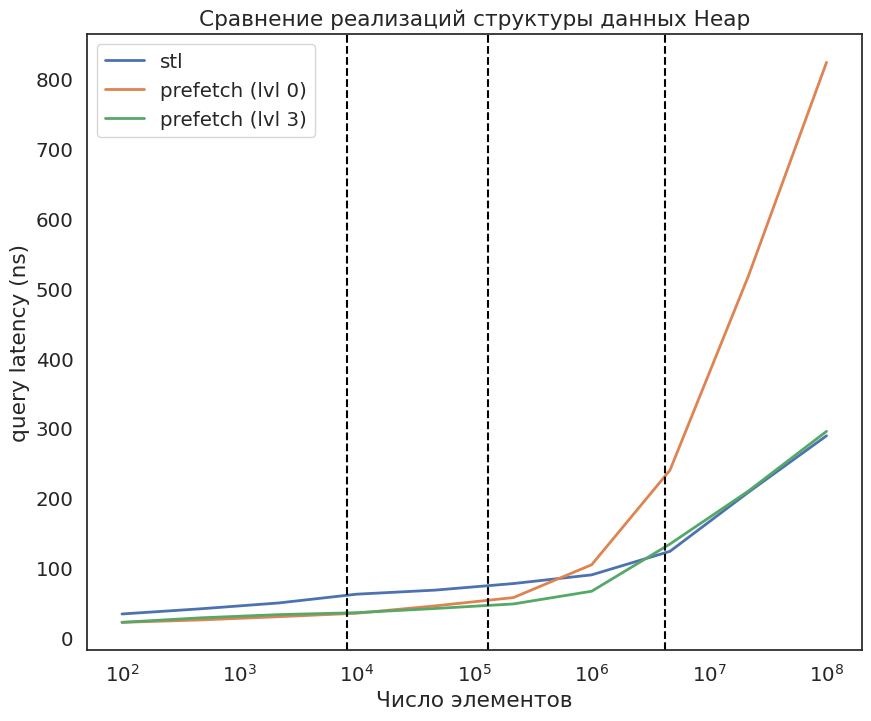

In [272]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('cmov_heap', [('prefetch', '-DPREFETCH_LEVEL=3'),]),
]
N_list = np.logspace(2, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

4-heap:   0%|          | 0/10 [00:00<?, ?it/s]

8-heap:   0%|          | 0/10 [00:00<?, ?it/s]

16-heap:   0%|          | 0/10 [00:00<?, ?it/s]

32-heap:   0%|          | 0/10 [00:00<?, ?it/s]

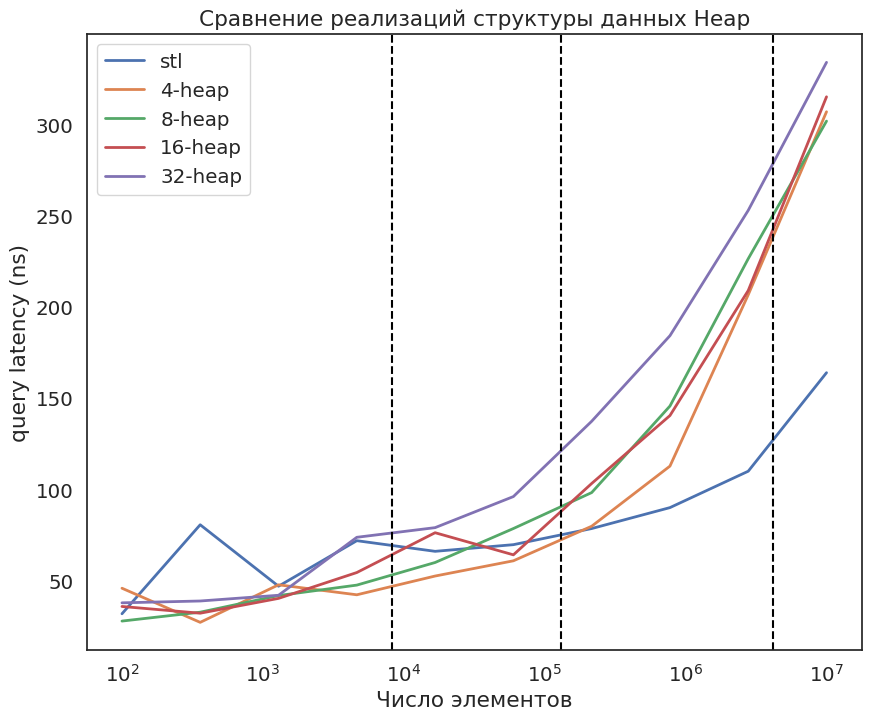

In [273]:
heaps = [
    ('stl_heap', [('stl', '')]),
    
    ('dheap', [
        ('4-heap', '-DBRANCHING_FACTOR=4'),
        ('8-heap', '-DBRANCHING_FACTOR=8'),
        ('16-heap', '-DBRANCHING_FACTOR=16'),
        ('32-heap', '-DBRANCHING_FACTOR=32')
    ]),
]
N_list = np.logspace(2, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch branch:   0%|          | 0/10 [00:00<?, ?it/s]

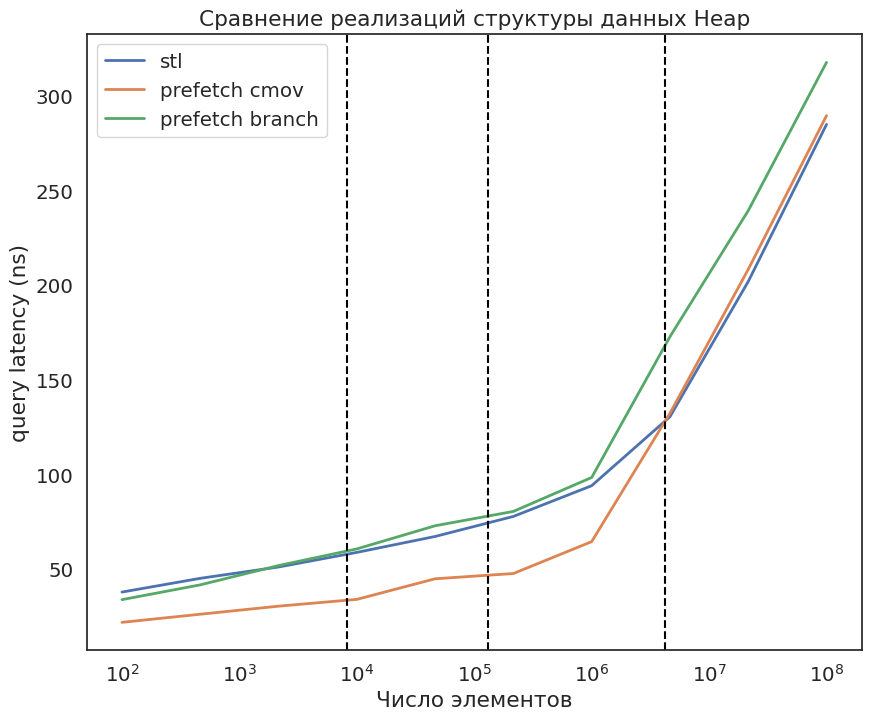

In [276]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('prefetch cmov', '-DPREFETCH_LEVEL=3'),
        ('prefetch branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
    ]),
]
N_list = np.logspace(2, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

8-heap:   0%|          | 0/10 [00:00<?, ?it/s]

simd:   0%|          | 0/10 [00:00<?, ?it/s]

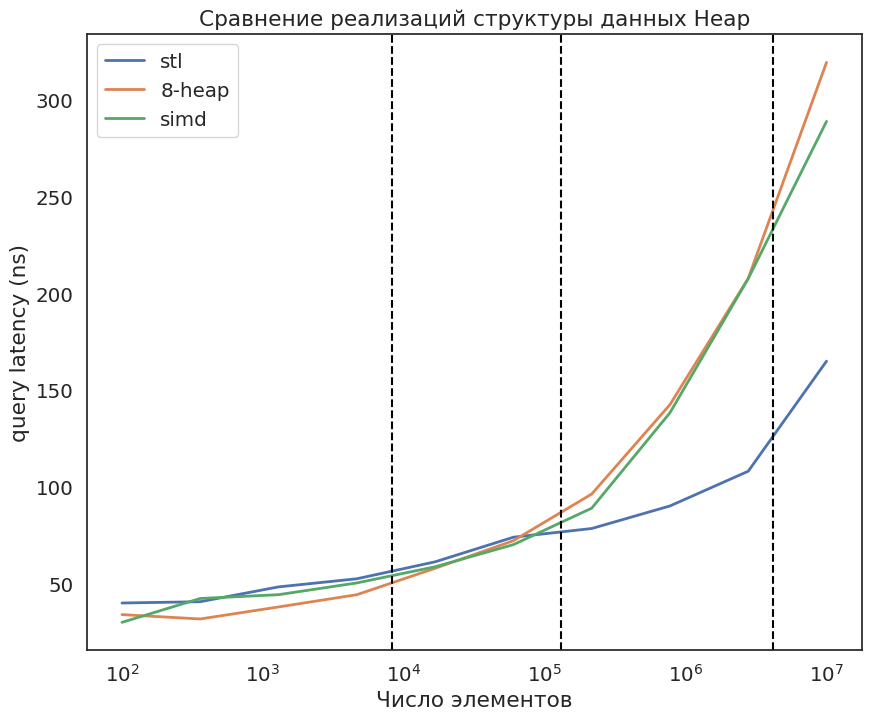

In [279]:
heaps = [
    ('stl_heap', [('stl', '')]),
    ('dheap', [('8-heap', '-DBRANCHING_FACTOR=8')]),
    ('simd_heap', [('simd', '')]),
]
N_list = np.logspace(2, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

no prefetch, branch :   0%|          | 0/10 [00:00<?, ?it/s]

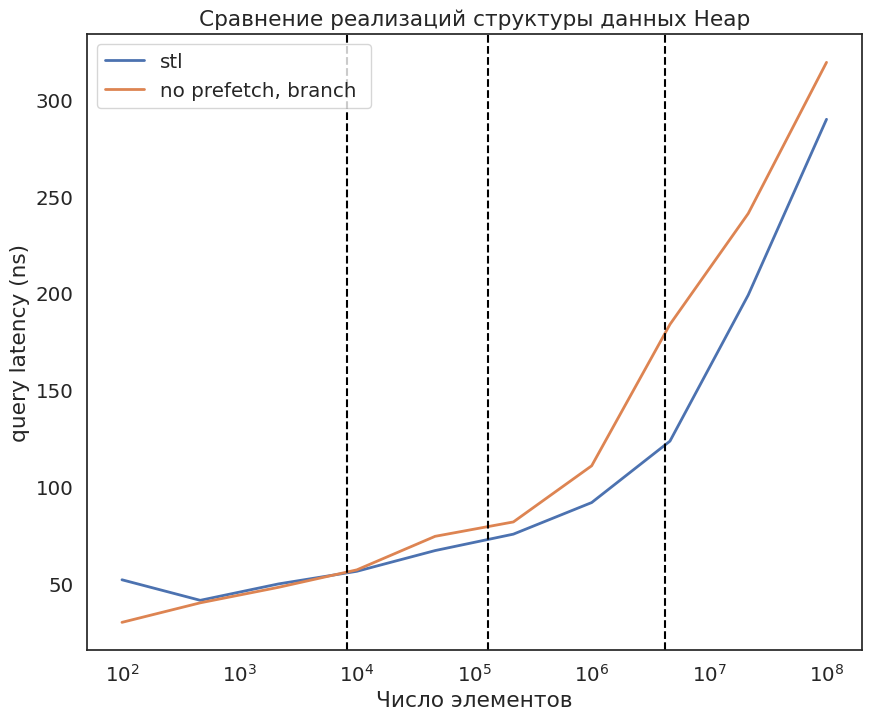

In [280]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('no prefetch, branch ', '-DPREFETCH_LEVEL=0 -DWITH_BRANCH'),
    ]),
]
N_list = np.logspace(2, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

simd:   0%|          | 0/10 [00:00<?, ?it/s]

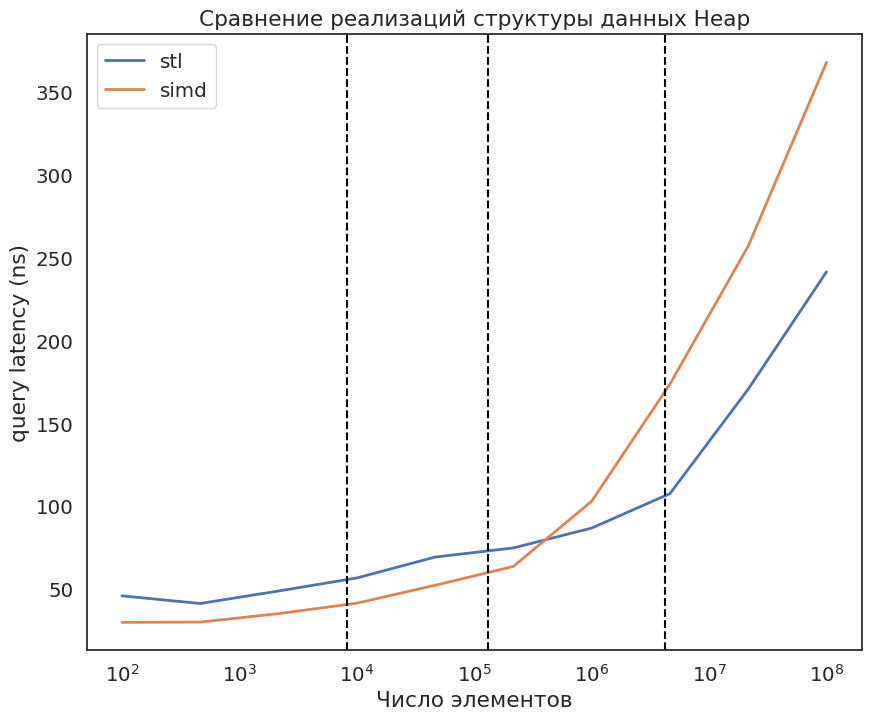

In [5]:
heaps = [
    ('stl_heap', [('stl', '')]),
    ('simd_heap', [('simd', '')]),
]
N_list = np.logspace(2, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

simd128:   0%|          | 0/10 [00:00<?, ?it/s]

simd256:   0%|          | 0/10 [00:00<?, ?it/s]

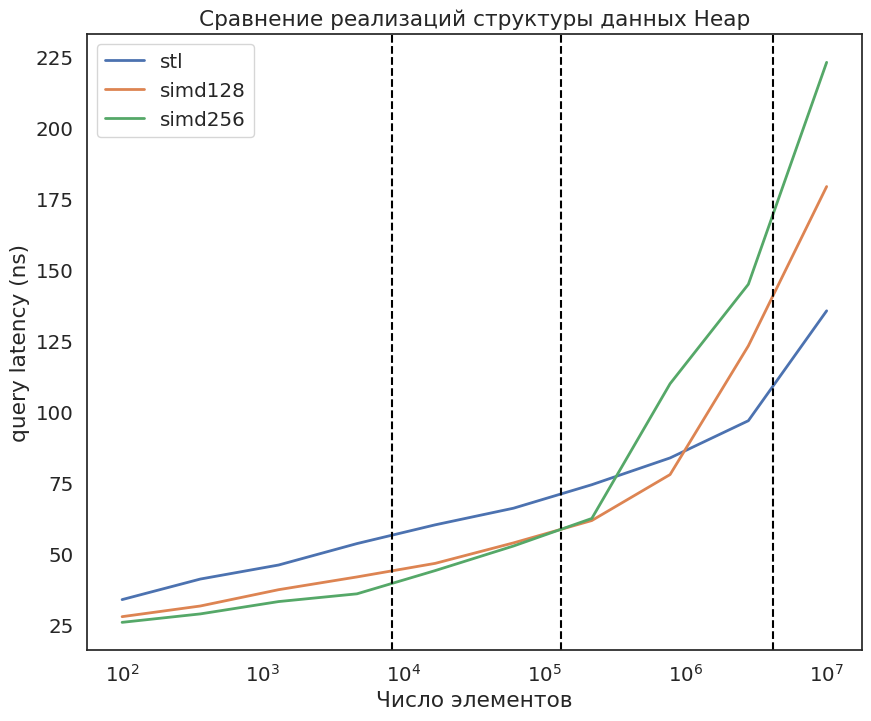

In [6]:
heaps = [
    ('stl_heap', [('stl', '')]),
    ('simd_4heap', [('simd128', '')]),
    ('simd_8heap', [('simd256', '')]),
]
N_list = np.logspace(2, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch branch:   0%|          | 0/10 [00:00<?, ?it/s]

4-heap:   0%|          | 0/10 [00:00<?, ?it/s]

8-heap:   0%|          | 0/10 [00:00<?, ?it/s]

simd128:   0%|          | 0/10 [00:00<?, ?it/s]

simd256:   0%|          | 0/10 [00:00<?, ?it/s]

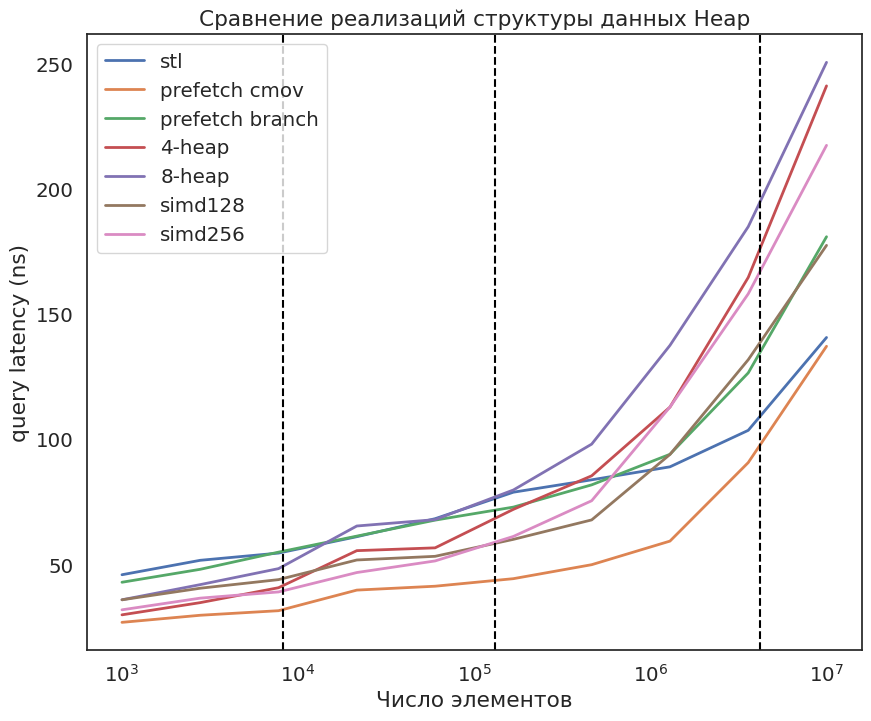

In [9]:
heaps = [
    ('stl_heap', [('stl', '')]),
    
    ('simple_heap', [
        ('prefetch cmov', '-DPREFETCH_LEVEL=3'),
        ('prefetch branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
    ]),
    
    ('dheap', [
        ('4-heap', '-DBRANCHING_FACTOR=4'),
        ('8-heap', '-DBRANCHING_FACTOR=8'),
    ]),
    
    ('simd_4heap', [('simd128', '')]),
    
    ('simd_8heap', [('simd256', '')]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

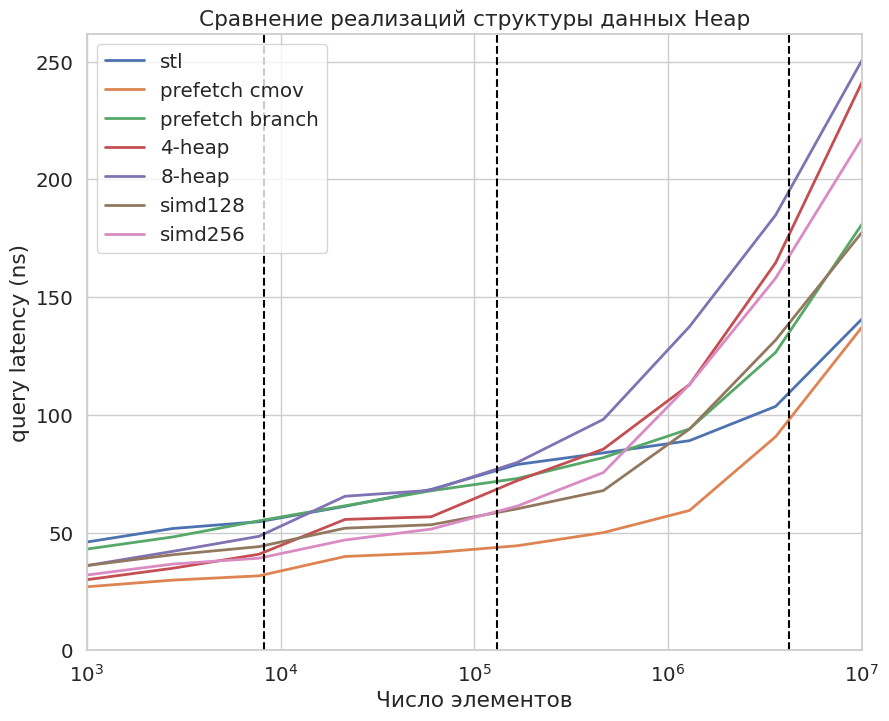

In [15]:
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch branch:   0%|          | 0/10 [00:00<?, ?it/s]

simd128:   0%|          | 0/10 [00:00<?, ?it/s]

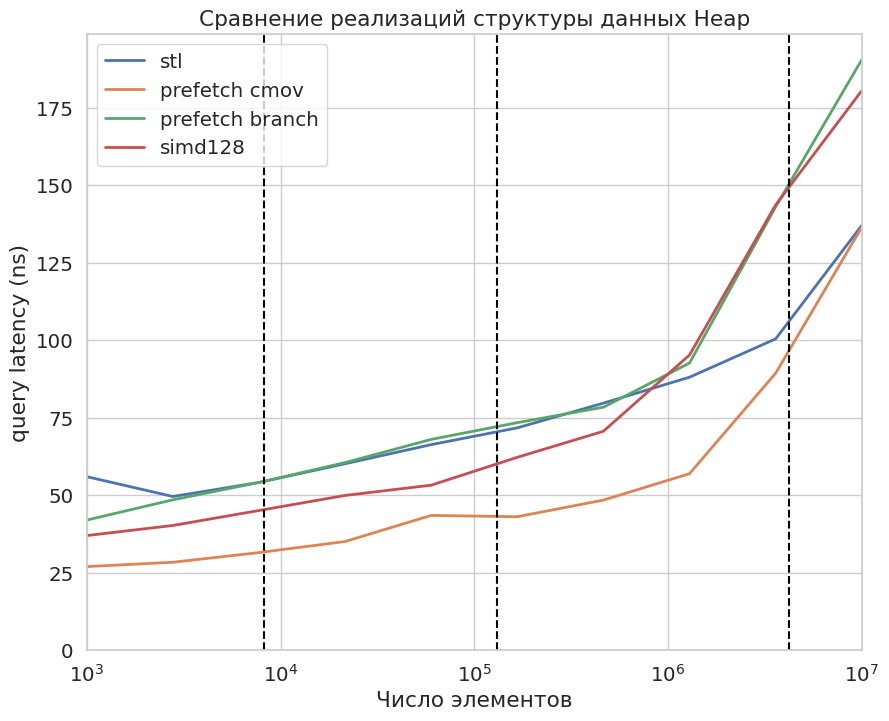

In [17]:
heaps = [
    ('stl_heap', [('stl', '')]),
    
    ('simple_heap', [
        ('prefetch cmov', '-DPREFETCH_LEVEL=3'),
        ('prefetch branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
    ]),
    ('simd_4heap', [('simd128', '')]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

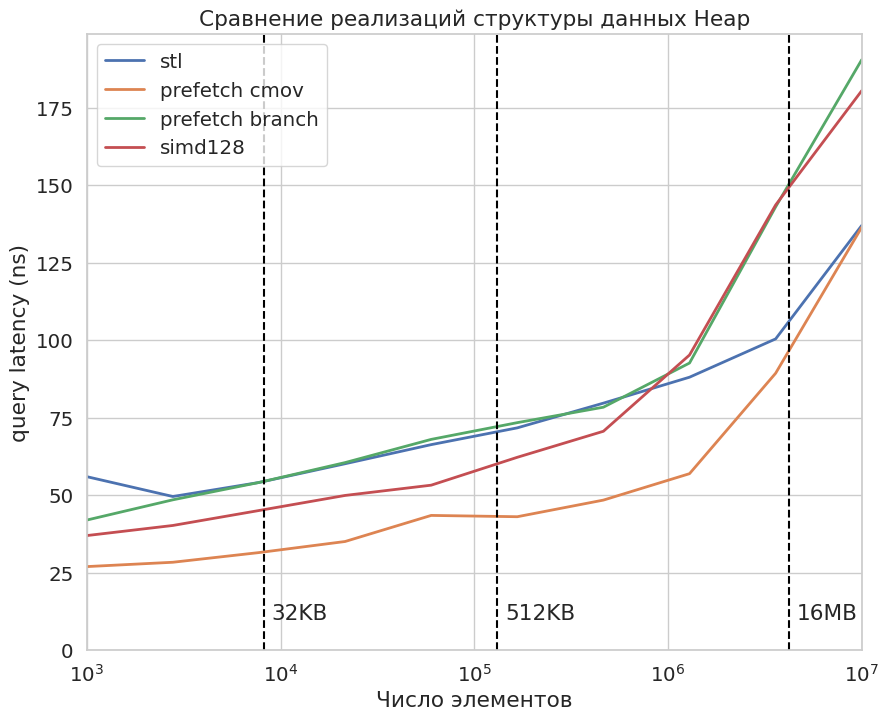

In [26]:
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3) cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 4) cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 5) cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3) branch:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 4) branch:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 5) branch:   0%|          | 0/10 [00:00<?, ?it/s]

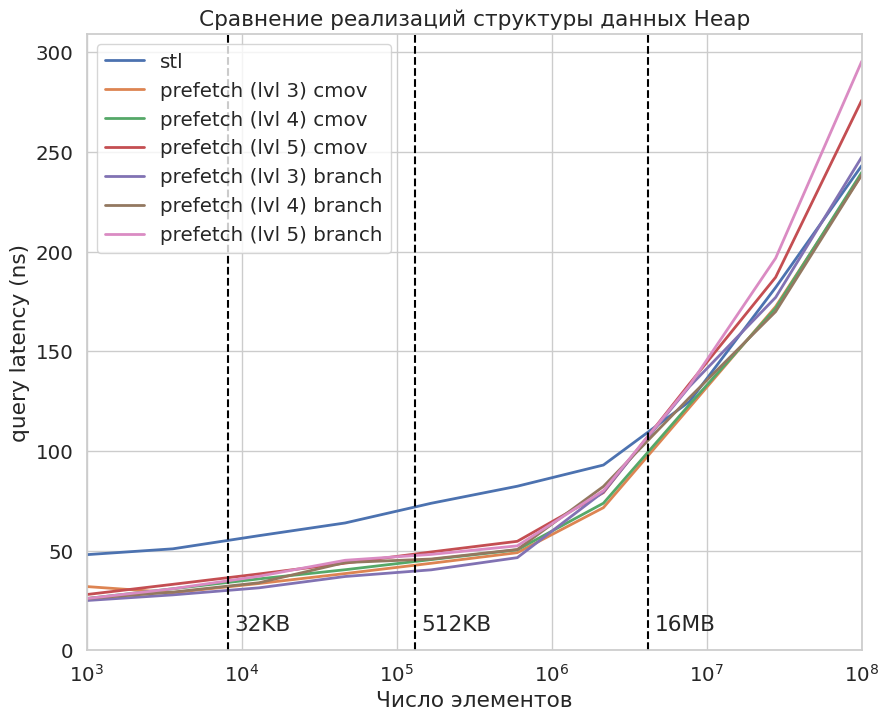

In [33]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('prefetch (lvl 3) cmov', '-DPREFETCH_LEVEL=3'),
        ('prefetch (lvl 4) cmov', '-DPREFETCH_LEVEL=4'),
        ('prefetch (lvl 5) cmov', '-DPREFETCH_LEVEL=5'),
        
        ('prefetch (lvl 3) branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
        ('prefetch (lvl 4) branch', '-DPREFETCH_LEVEL=4 -DWITH_BRANCH'),
        ('prefetch (lvl 5) branch', '-DPREFETCH_LEVEL=5 -DWITH_BRANCH'),
    ]),
]
N_list = np.logspace(3, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3) cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 4) cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 5) cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3) branch:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 4) branch:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 5) branch:   0%|          | 0/10 [00:00<?, ?it/s]

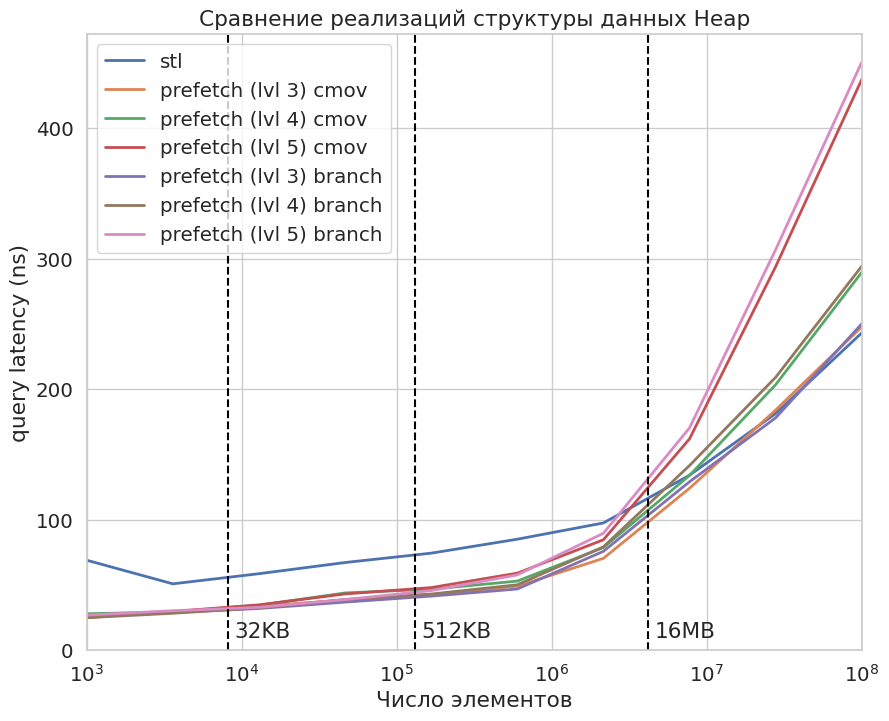

In [34]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('prefetch (lvl 3) cmov', '-DPREFETCH_LEVEL=3'),
        ('prefetch (lvl 4) cmov', '-DPREFETCH_LEVEL=4'),
        ('prefetch (lvl 5) cmov', '-DPREFETCH_LEVEL=5'),
        
        ('prefetch (lvl 3) branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
        ('prefetch (lvl 4) branch', '-DPREFETCH_LEVEL=4 -DWITH_BRANCH'),
        ('prefetch (lvl 5) branch', '-DPREFETCH_LEVEL=5 -DWITH_BRANCH'),
    ]),
]
N_list = np.logspace(3, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3) branch:   0%|          | 0/10 [00:00<?, ?it/s]

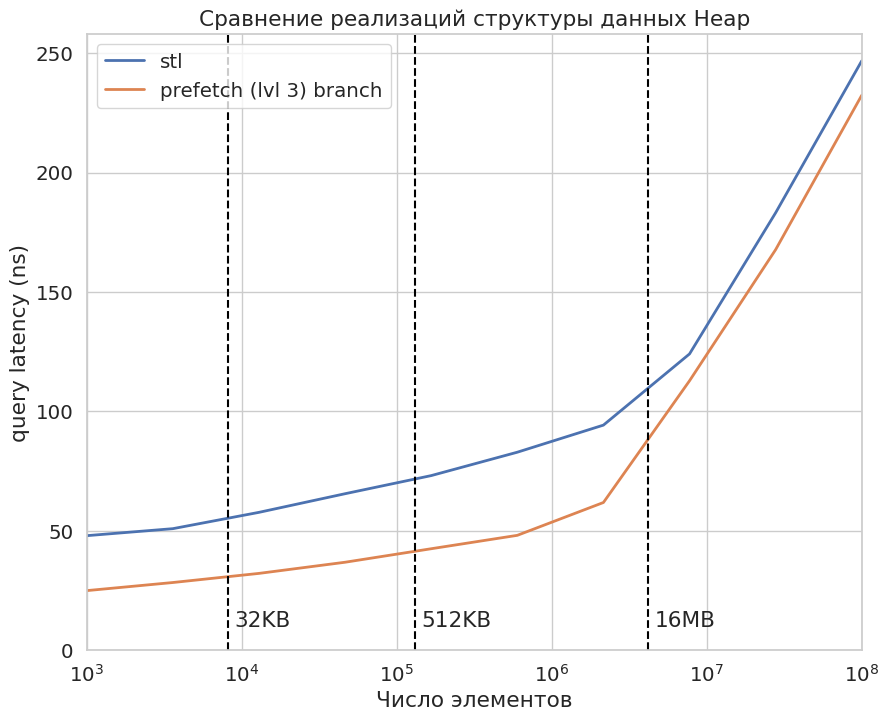

In [36]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('prefetch (lvl 3) branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
    ]),
]
N_list = np.logspace(3, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

noprefetch branch:   0%|          | 0/10 [00:00<?, ?it/s]

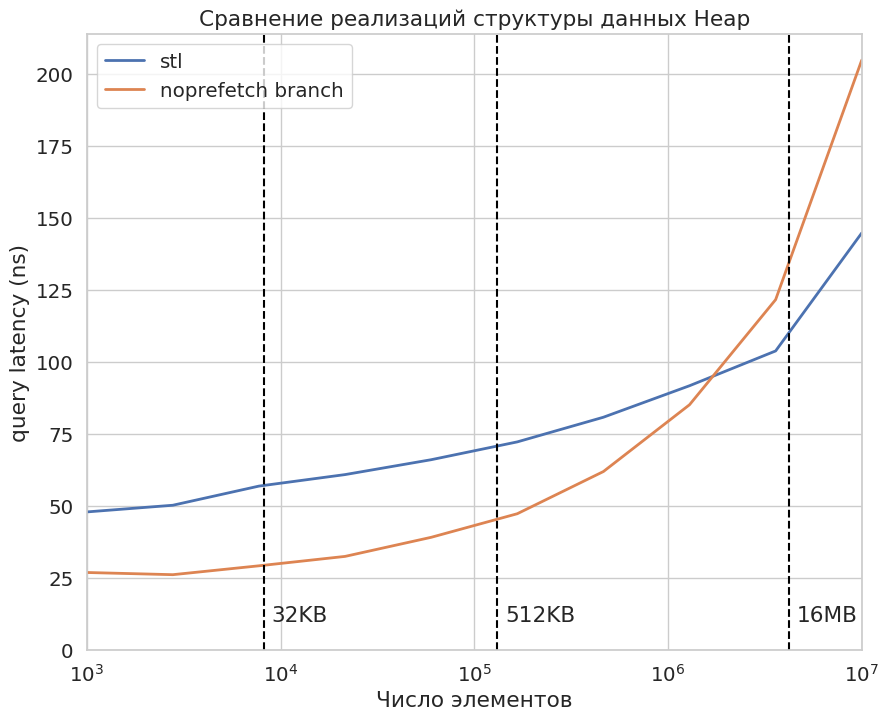

In [37]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('noprefetch branch', '-DWITH_BRANCH'),
    ]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

noprefetch branch:   0%|          | 0/10 [00:00<?, ?it/s]

noprefetch cmov:   0%|          | 0/10 [00:00<?, ?it/s]

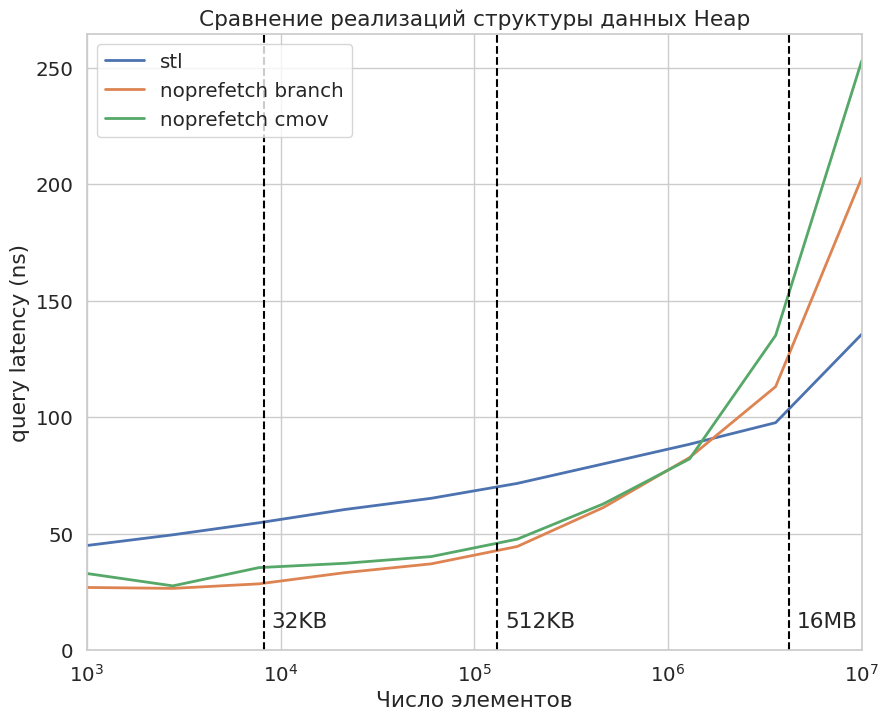

In [39]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('noprefetch branch', '-DWITH_BRANCH'),
        ('noprefetch cmov', ''),
    ]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch branch:   0%|          | 0/10 [00:00<?, ?it/s]

simd128:   0%|          | 0/10 [00:00<?, ?it/s]

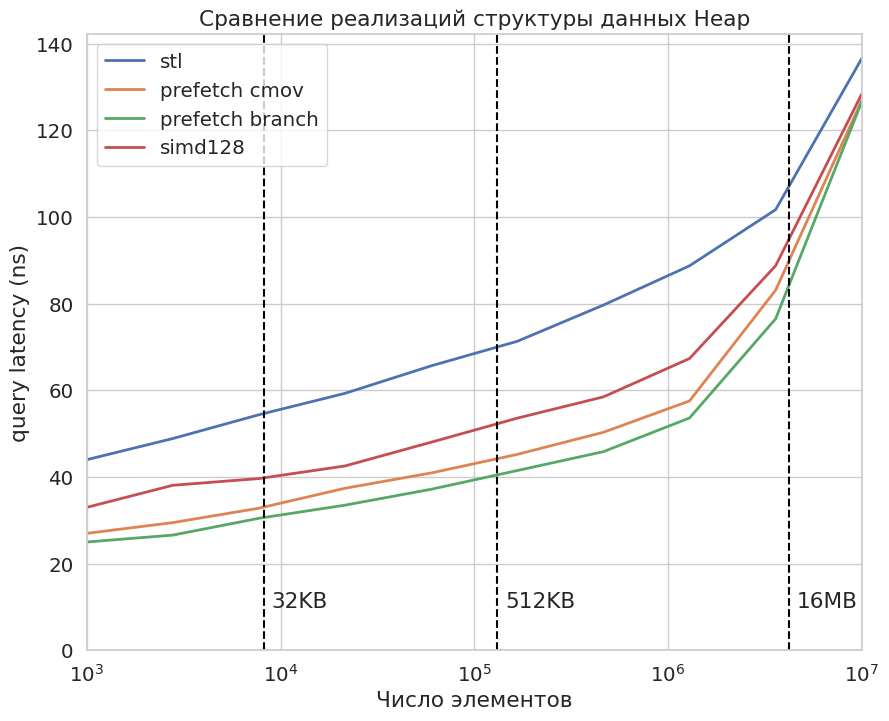

In [7]:
heaps = [
    ('stl_heap', [('stl', '')]),
    
    ('simple_heap', [
        ('prefetch cmov', '-DPREFETCH_LEVEL=3'),
        ('prefetch branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
    ]),
    ('simd_4heap', [('simd128', '')]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

cmov:   0%|          | 0/10 [00:00<?, ?it/s]

branch:   0%|          | 0/10 [00:00<?, ?it/s]

4-heap:   0%|          | 0/10 [00:00<?, ?it/s]

simd128:   0%|          | 0/10 [00:00<?, ?it/s]

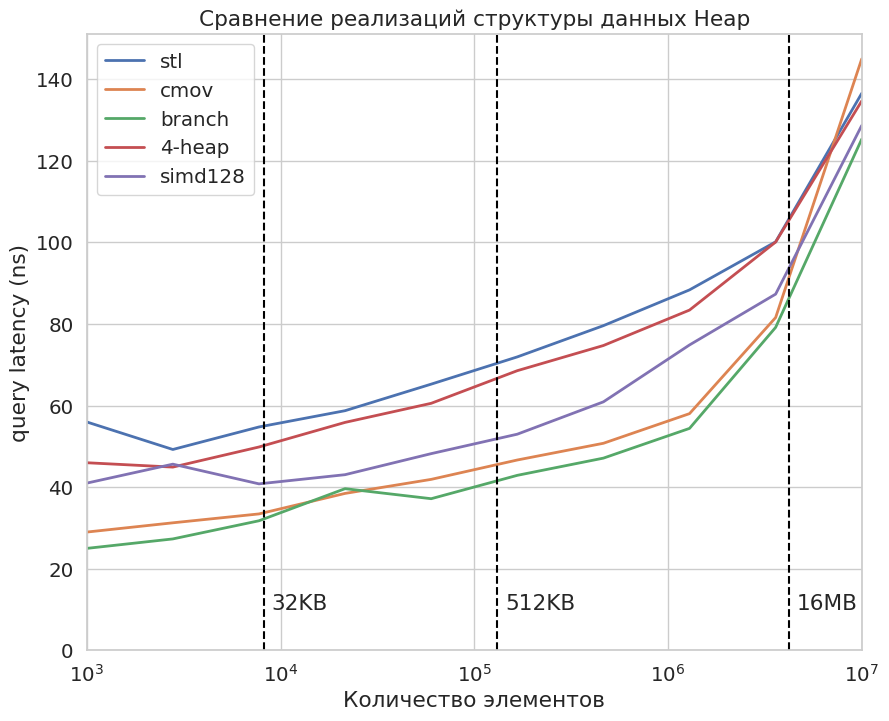

In [47]:
heaps = [
    ('stl_heap', [('stl', '')]),
    ('cmov_heap', [('cmov', '')]),
    ('branch_heap', [('branch', '')]),
    ('dary_heap', [('4-heap', '')]),
    ('simd128_heap', [('simd128', '')]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)